In [76]:
import os
import torch
from transformers import CLIPProcessor
from torchvision import transforms

os.chdir("/srv/flash1/pputta7/projects/lm-nav")

imgs = torch.load("raw_imgs_old.pt")
# imgs = torch.randint(0, 225, (20, 400, 400, 3))
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

In [77]:
out_real = processor(images=imgs, return_tensors="pt")['pixel_values']
out_custom = custom_processor(imgs.permute(0, 3, 1, 2))
out_real2_intermediate = {}

In [87]:
processor.image_processor

CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "CLIPFeatureExtractor",
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [78]:
from transformers.image_utils import (
    OPENAI_CLIP_MEAN,
    OPENAI_CLIP_STD,
    ChannelDimension,
    ImageInput,
    PILImageResampling,
    infer_channel_dimension_format,
    is_scaled_image,
    make_list_of_images,
    to_numpy_array,
    valid_images,
)
from typing import Dict, Union, Optional, List
import PIL
from transformers.image_processing_utils import BaseImageProcessor, BatchFeature, get_size_dict
from transformers.image_transforms import (
    convert_to_rgb,
    get_resize_output_image_size,
    resize,
    to_channel_dimension_format,
)
def preprocess(
        self,
        images: ImageInput,
        do_resize: bool = None,
        size: Dict[str, int] = None,
        resample: PILImageResampling = None,
        do_center_crop: bool = None,
        crop_size: int = None,
        do_rescale: bool = None,
        rescale_factor: float = None,
        do_normalize: bool = None,
        image_mean: Optional[Union[float, List[float]]] = None,
        image_std: Optional[Union[float, List[float]]] = None,
        do_convert_rgb: bool = None,
        return_tensors: Optional[Union[str]] = None,
        data_format: Optional[ChannelDimension] = ChannelDimension.FIRST,
        input_data_format: Optional[Union[str, ChannelDimension]] = None,
        **kwargs,
    ) -> PIL.Image.Image:
        """
        Preprocess an image or batch of images.

        Args:
            images (`ImageInput`):
                Image to preprocess. Expects a single or batch of images with pixel values ranging from 0 to 255. If
                passing in images with pixel values between 0 and 1, set `do_rescale=False`.
            do_resize (`bool`, *optional*, defaults to `self.do_resize`):
                Whether to resize the image.
            size (`Dict[str, int]`, *optional*, defaults to `self.size`):
                Size of the image after resizing. Shortest edge of the image is resized to size["shortest_edge"], with
                the longest edge resized to keep the input aspect ratio.
            resample (`int`, *optional*, defaults to `self.resample`):
                Resampling filter to use if resizing the image. This can be one of the enum `PILImageResampling`. Only
                has an effect if `do_resize` is set to `True`.
            do_center_crop (`bool`, *optional*, defaults to `self.do_center_crop`):
                Whether to center crop the image.
            crop_size (`Dict[str, int]`, *optional*, defaults to `self.crop_size`):
                Size of the center crop. Only has an effect if `do_center_crop` is set to `True`.
            do_rescale (`bool`, *optional*, defaults to `self.do_rescale`):
                Whether to rescale the image.
            rescale_factor (`float`, *optional*, defaults to `self.rescale_factor`):
                Rescale factor to rescale the image by if `do_rescale` is set to `True`.
            do_normalize (`bool`, *optional*, defaults to `self.do_normalize`):
                Whether to normalize the image.
            image_mean (`float` or `List[float]`, *optional*, defaults to `self.image_mean`):
                Image mean to use for normalization. Only has an effect if `do_normalize` is set to `True`.
            image_std (`float` or `List[float]`, *optional*, defaults to `self.image_std`):
                Image standard deviation to use for normalization. Only has an effect if `do_normalize` is set to
                `True`.
            do_convert_rgb (`bool`, *optional*, defaults to `self.do_convert_rgb`):
                Whether to convert the image to RGB.
            return_tensors (`str` or `TensorType`, *optional*):
                The type of tensors to return. Can be one of:
                - Unset: Return a list of `np.ndarray`.
                - `TensorType.TENSORFLOW` or `'tf'`: Return a batch of type `tf.Tensor`.
                - `TensorType.PYTORCH` or `'pt'`: Return a batch of type `torch.Tensor`.
                - `TensorType.NUMPY` or `'np'`: Return a batch of type `np.ndarray`.
                - `TensorType.JAX` or `'jax'`: Return a batch of type `jax.numpy.ndarray`.
            data_format (`ChannelDimension` or `str`, *optional*, defaults to `ChannelDimension.FIRST`):
                The channel dimension format for the output image. Can be one of:
                - `"channels_first"` or `ChannelDimension.FIRST`: image in (num_channels, height, width) format.
                - `"channels_last"` or `ChannelDimension.LAST`: image in (height, width, num_channels) format.
                - Unset: Use the channel dimension format of the input image.
            input_data_format (`ChannelDimension` or `str`, *optional*):
                The channel dimension format for the input image. If unset, the channel dimension format is inferred
                from the input image. Can be one of:
                - `"channels_first"` or `ChannelDimension.FIRST`: image in (num_channels, height, width) format.
                - `"channels_last"` or `ChannelDimension.LAST`: image in (height, width, num_channels) format.
                - `"none"` or `ChannelDimension.NONE`: image in (height, width) format.
        """
        do_resize = do_resize if do_resize is not None else self.do_resize
        size = size if size is not None else self.size
        size = get_size_dict(size, param_name="size", default_to_square=False)
        resample = resample if resample is not None else self.resample
        do_center_crop = do_center_crop if do_center_crop is not None else self.do_center_crop
        crop_size = crop_size if crop_size is not None else self.crop_size
        crop_size = get_size_dict(crop_size, param_name="crop_size", default_to_square=True)
        do_rescale = do_rescale if do_rescale is not None else self.do_rescale
        rescale_factor = rescale_factor if rescale_factor is not None else self.rescale_factor
        do_normalize = do_normalize if do_normalize is not None else self.do_normalize
        image_mean = image_mean if image_mean is not None else self.image_mean
        image_std = image_std if image_std is not None else self.image_std
        do_convert_rgb = do_convert_rgb if do_convert_rgb is not None else self.do_convert_rgb

        images = make_list_of_images(images)

        if not valid_images(images):
            raise ValueError(
                "Invalid image type. Must be of type PIL.Image.Image, numpy.ndarray, "
                "torch.Tensor, tf.Tensor or jax.ndarray."
            )

        if do_resize and size is None:
            raise ValueError("Size must be specified if do_resize is True.")

        if do_center_crop and crop_size is None:
            raise ValueError("Crop size must be specified if do_center_crop is True.")

        if do_rescale and rescale_factor is None:
            raise ValueError("Rescale factor must be specified if do_rescale is True.")

        if do_normalize and (image_mean is None or image_std is None):
            raise ValueError("Image mean and std must be specified if do_normalize is True.")

        # PIL RGBA images are converted to RGB
        if do_convert_rgb:
            images = [convert_to_rgb(image) for image in images]

        # All transformations expect numpy arrays.
        images = [to_numpy_array(image) for image in images]

        if is_scaled_image(images[0]) and do_rescale:
            logger.warning_once(
                "It looks like you are trying to rescale already rescaled images. If the input"
                " images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again."
            )

        if input_data_format is None:
            # We assume that all images have the same channel dimension format.
            input_data_format = infer_channel_dimension_format(images[0])

        
        out_real2_intermediate['pre'] = [x.copy() for x in images]
        if do_resize:
            images = [
                self.resize(image=image, size=size, resample=resample, input_data_format=input_data_format)
                for image in images
            ]
            out_real2_intermediate['resize'] = [x.copy() for x in images]
            

        if do_center_crop:
            images = [
                self.center_crop(image=image, size=crop_size, input_data_format=input_data_format) for image in images
            ]
            out_real2_intermediate['crop'] = [x.copy() for x in images]

        if do_rescale:
            images = [
                self.rescale(image=image, scale=rescale_factor, input_data_format=input_data_format)
                for image in images
            ]
            out_real2_intermediate['rescale'] = [x.copy() for x in images]
            

        if do_normalize:
            images = [
                self.normalize(image=image, mean=image_mean, std=image_std, input_data_format=input_data_format)
                for image in images
            ]
            out_real2_intermediate['normalize'] = [x.copy() for x in images]

        images = [
            to_channel_dimension_format(image, data_format, input_channel_dim=input_data_format) for image in images
        ]
        out_real2_intermediate['final'] = [x.copy() for x in images]

        data = {"pixel_values": images}
        return BatchFeature(data=data, tensor_type=return_tensors)

In [79]:
import numpy as np
out_real2 = preprocess(processor.image_processor, images=imgs, return_tensors="pt")['pixel_values']
out_real2_intermediate = {k: torch.from_numpy(np.stack(v)) for k, v in out_real2_intermediate.items()}
torch.all(out_real == out_real2)

tensor(True)

In [107]:
class ScaleTransform:
    def __init__(self, scale_factor):
        self.scale_factor = scale_factor

    def __call__(self, x):
        x = x.float()
        return x * self.scale_factor
        
transforms_list = [
                transforms.Resize(
                    224,
                    interpolation=transforms.InterpolationMode.BICUBIC,
                    antialias=True,
                ),
                transforms.CenterCrop(224),
                transforms.ConvertImageDtype(torch.float),
                transforms.Normalize(
                    mean=[0.48145466, 0.4578275, 0.40821073],
                    std=[0.26862954, 0.26130258, 0.27577711],
                    inplace=True,
                ),
            ]
create_processor = lambda i: transforms.Compose(transforms_list[:i])

In [111]:
from matplotlib import pyplot as plt

assert torch.allclose(imgs, out_real2_intermediate['pre'])

resize = create_processor(1)(imgs.permute(0, 3, 1, 2))
print(torch.max(torch.abs(out_real2_intermediate['resize'].long() - resize.permute(0, 2, 3, 1)).float()))
assert torch.allclose(out_real2_intermediate['resize'].long(), resize.permute(0, 2, 3, 1).long())

crop = create_processor(2)(imgs.permute(0, 3, 1, 2))
print(torch.max(torch.abs(out_real2_intermediate['resize'].long() - crop.permute(0, 2, 3, 1)).float()))
assert torch.allclose(out_real2_intermediate['resize'].long(), resize.permute(0, 2, 3, 1).long())

rescale = create_processor(3)(imgs.permute(0, 3, 1, 2))
print(torch.mean(torch.abs(out_real2_intermediate['rescale'].float() - rescale.permute(0, 2, 3, 1)).float()))
assert torch.allclose(out_real2_intermediate['rescale'].float(), rescale.permute(0, 2, 3, 1).float())

normalized = create_processor(4)(imgs.permute(0, 3, 1, 2))
print(torch.mean(torch.abs(out_real2_intermediate['normalize'].float() - normalized.permute(0, 2, 3, 1).float())))
assert torch.allclose(out_real2_intermediate['normalize'].float(), normalized.permute(0, 2, 3, 1).float())

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


In [113]:
out_custom = transforms.Compose(transforms_list)(imgs.permute(0, 3, 1, 2))
torch.allclose(out_custom, out_real2)

True

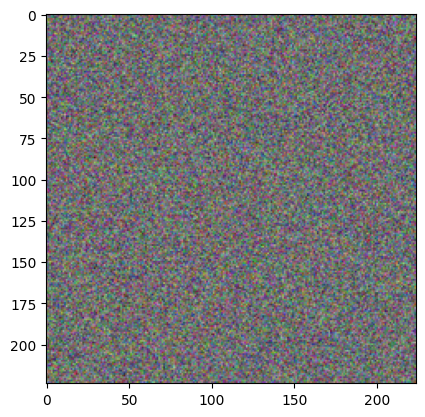

In [74]:
plt.imshow(resize.permute(0, 2, 3, 1)[0])
